In [ ]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.7/811.7 MB ? eta 0:00:00B/s eta 0:00:010:00:15� 811.6/811.7 MB 901.1 kB/s eta 0:00:01� 811.6/811.7 MB 901.1 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 998.2 kB/s eta 0:00:00eta 0:00:010:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 1.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 455.1 kB/s eta 0:00:00m eta 0:00:010:00:07
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 825.4 kB/s eta 0:00:00m eta 0:00:010:00:04
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 MB 738.1 kB/s eta 0:00:00m eta 0:00:010:00:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 1.2 MB/s eta 0:00:00m eta 0:00:010:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 KB 1.4 MB/s eta 0:00:00m eta 

In [ ]:
!pip install ultralytics


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.4/709.4 KB 1.7 MB/s eta 0:00:00m eta 0:00:010:01:01
  Using cached tqdm-4.66.1-py3-none-any.whl (78 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)


In [ ]:
import torch
import numpy as np
from matplotlib import pyplot as plt
import cv2
import ultralytics
from ultralytics import YOLO
import math

In [ ]:
model = YOLO("yolov8m.pt")

In [ ]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

/home/sujan/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:141: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0



Found https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland,_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland,_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg locally at 800px-Cars_in_traffic_in_Auckland,_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg
image 1/1 /home/sujan/Desktop/drowsiness/800px-Cars_in_traffic_in_Auckland,_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg: 448x640 25 cars, 5 trucks, 1012.3ms
Speed: 9.2ms preprocess, 1012.3ms inference, 12.5ms postprocess per image at shape (1, 3, 448, 640)


[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


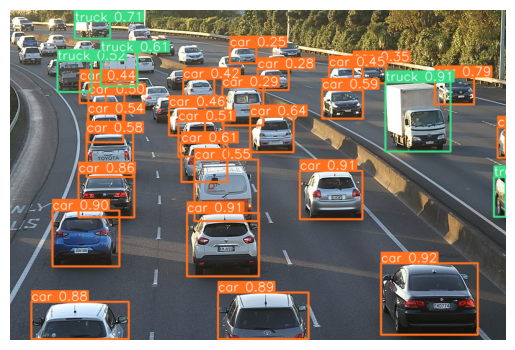

In [ ]:
results = model(img)

# Process the results
# The results object contains the images with bounding boxes and labels
rendered_img = results[0].plot()  # plot() returns an image with bounding boxes and labels

# Convert the image (from BGR to RGB) for Matplotlib
rendered_img = cv2.cvtColor(rendered_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(rendered_img)
plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # Make detections
    results = model(frame)

    rendered_frame = results[0].plot()  # Plot returns the image with bounding boxes and labels

    # Display the frame with detections
    cv2.imshow('YOLO', rendered_frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


0: 480x640 (no detections), 1060.8ms
Speed: 6.2ms preprocess, 1060.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


   QT_AUTO_SCREEN_SCALE_FACTOR to enable platform plugin controlled per-screen factors.
   QT_SCREEN_SCALE_FACTORS to set per-screen DPI.
   QT_SCALE_FACTOR to set the application global scale factor.



0: 480x640 (no detections), 949.5ms
Speed: 3.0ms preprocess, 949.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 902.1ms
Speed: 7.2ms preprocess, 902.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 1230.3ms
Speed: 6.7ms preprocess, 1230.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 1359.3ms
Speed: 5.3ms preprocess, 1359.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1160.4ms
Speed: 3.6ms preprocess, 1160.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1390.8ms
Speed: 4.3ms preprocess, 1390.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1464.6ms
Speed: 2.9ms preprocess, 1464.6ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1533.7ms
Speed: 6.6ms preprocess, 1533.7ms i

Training Model


In [ ]:
import uuid   # Unique identifier
import os
import time

In [ ]:
IMG_PATH = os.path.join('data', 'images')

In [ ]:
IMG_PATH

'data/images'

In [ ]:
os.makedirs(IMG_PATH)

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # Collect awake
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # Create the unique file path
        imgname = os.path.join(IMG_PATH, 'awake.'+str(uuid.uuid1())+'.jpg')
        # Write out  image
        cv2.imwrite(imgname, frame)

    # Collect sleepy
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create the unique file path
        imgname = os.path.join(IMG_PATH, 'sleepy.'+str(uuid.uuid1())+'.jpg')
        # Write out  image
        cv2.imwrite(imgname, frame)

    # Show image back to screen
    cv2.imshow('Image Collection', frame)

    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break

# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

In [ ]:
pip install labelImg

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 KB 540.4 kB/s eta 0:00:001m523.2 kB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 739.1 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 476.9 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 KB 486.3 kB/s eta 0:00:001m474.5 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 609.9 kB/s eta 0:00:00m eta 0:00:010:00:03
  Created wheel for labelImg: filename=labelImg-1.8.6-py2.py3-none-any.whl size=261540 sha256=b3c5e23e18f7d10fc06383a11dd6cc76e3ad8ca6f6c2da1da736e67455ef6765
  Stored in directory: /home/sujan/.cache/pip/wheels/d9/f0/1e/74c509495458cad13a0fda23fe605e643177625cf2b5c17b34
Successfully built labelImg
Note: you may need to restart the kernel to use updated packages.


Loading trained model

In [ ]:
modelc = YOLO('best.pt')

In [ ]:
img = 'sleepy.90de7db6-1e6b-11ef-9540-55bd2aeceac6.jpg'


image 1/1 /home/sujan/Desktop/drowsiness/sleepy.90de7db6-1e6b-11ef-9540-55bd2aeceac6.jpg: 480x640 1 sleepy, 552.7ms
Speed: 2.6ms preprocess, 552.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


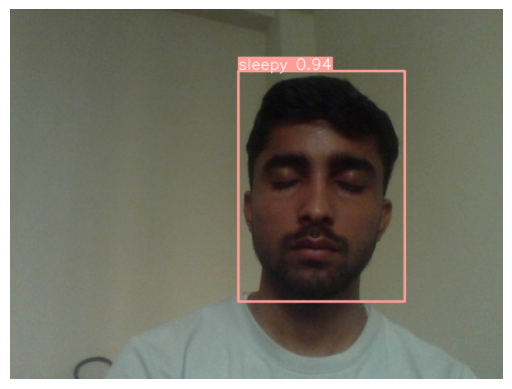

In [ ]:
results = modelc(img)

# Process the results
# The results object contains the images with bounding boxes and labels
rendered_img = results[0].plot()  # plot() returns an image with bounding boxes and labels

# Convert the image (from BGR to RGB) for Matplotlib
rendered_img = cv2.cvtColor(rendered_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(rendered_img)
plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # Make detections
    results = modelc(frame)

    rendered_frame = results[0].plot()  # Plot returns the image with bounding boxes and labels

    # Display the frame with detections
    cv2.imshow('YOLO', rendered_frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


0: 480x640 1 sleepy, 498.9ms
Speed: 6.3ms preprocess, 498.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


   QT_AUTO_SCREEN_SCALE_FACTOR to enable platform plugin controlled per-screen factors.
   QT_SCREEN_SCALE_FACTORS to set per-screen DPI.
   QT_SCALE_FACTOR to set the application global scale factor.



0: 480x640 1 awake, 510.3ms
Speed: 3.0ms preprocess, 510.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 sleepy, 391.0ms
Speed: 2.9ms preprocess, 391.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 sleepy, 370.4ms
Speed: 3.1ms preprocess, 370.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 awake, 400.4ms
Speed: 3.9ms preprocess, 400.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 sleepy, 374.5ms
Speed: 4.0ms preprocess, 374.5ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 awake, 630.4ms
Speed: 4.1ms preprocess, 630.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 awake, 566.0ms
Speed: 2.7ms preprocess, 566.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 awake, 564.4ms
Speed: 3.9ms preprocess, 564.4ms inference, 1.9ms postprocess per image at shap